In [109]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [110]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [111]:
df = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


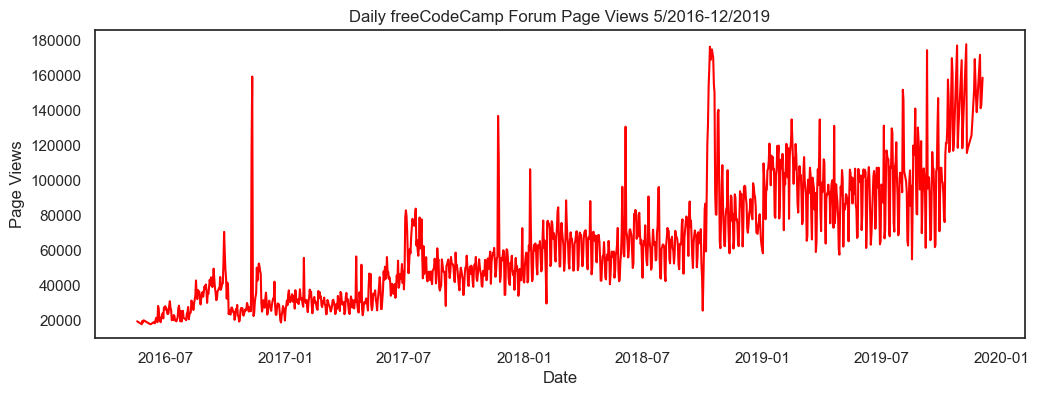

In [112]:
fig, ax = plt.subplots(figsize=[12, 4])

ax.plot(df.index, df["value"], c="red")
ax.set(
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
    xlabel="Date",
    ylabel="Page Views"
)
plt.show()

In [113]:
dates_in_order = pd.date_range(start="2022-01-01", end="2022-12-01", freq="MS")
months_in_order = dates_in_order.map(lambda x: x.month_name()).to_list()

df_grp = df.copy()
df_grp["year"] = df.index.year
df_grp["month_name"] = df.index.strftime("%B")
df_grp["Months"] = pd.Categorical(
    df_grp["month_name"],
    categories=months_in_order,
    ordered=True
)

df_grp

,value,year,month_name,Months
date,,,,
2016-05-19,19736,2016,May,May
2016-05-26,18060,2016,May,May
2016-05-27,19997,2016,May,May
2016-05-28,19044,2016,May,May
2016-05-29,20325,2016,May,May
...,...,...,...,...
2019-11-24,138875,2019,November,November
2019-11-29,171584,2019,November,November
2019-11-30,141161,2019,November,November


In [114]:
df_bar = pd.pivot_table(
    df_grp,
    values="value",
    index="year",
    columns="Months",
    aggfunc="mean"
)

df_bar

Months,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


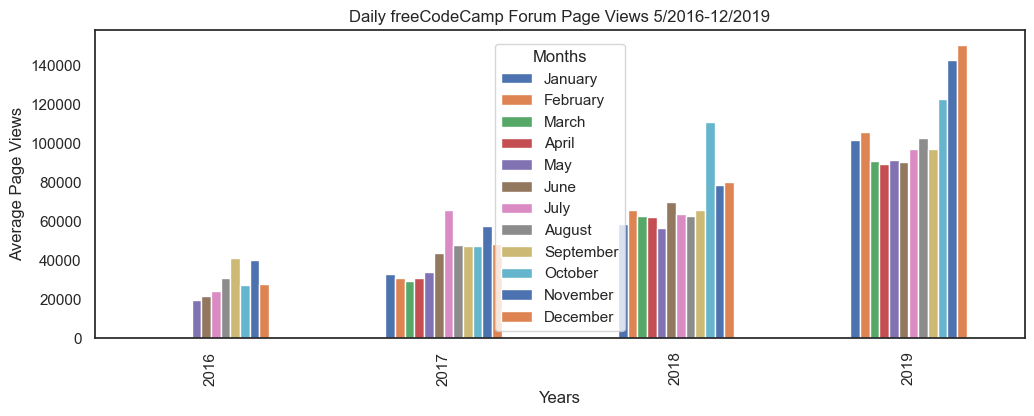

In [115]:
# fig, ax = plt.subplots(figsize=[12, 4])

fig = df_bar.plot(
    kind="bar",
    legend=True,
    figsize=(12, 4)
)

plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Years")
plt.ylabel("Average Page Views")

# ax.set(
#     title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
#     xlabel="Years",
#     ylabel="Average Page Views",
# )

plt.show()

In [116]:
dates_in_order = pd.date_range(start="2022-01-01", end="2022-12-01", freq="MS")
months_in_order = [date.strftime("%b") for date in dates_in_order]
print(months_in_order)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [117]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


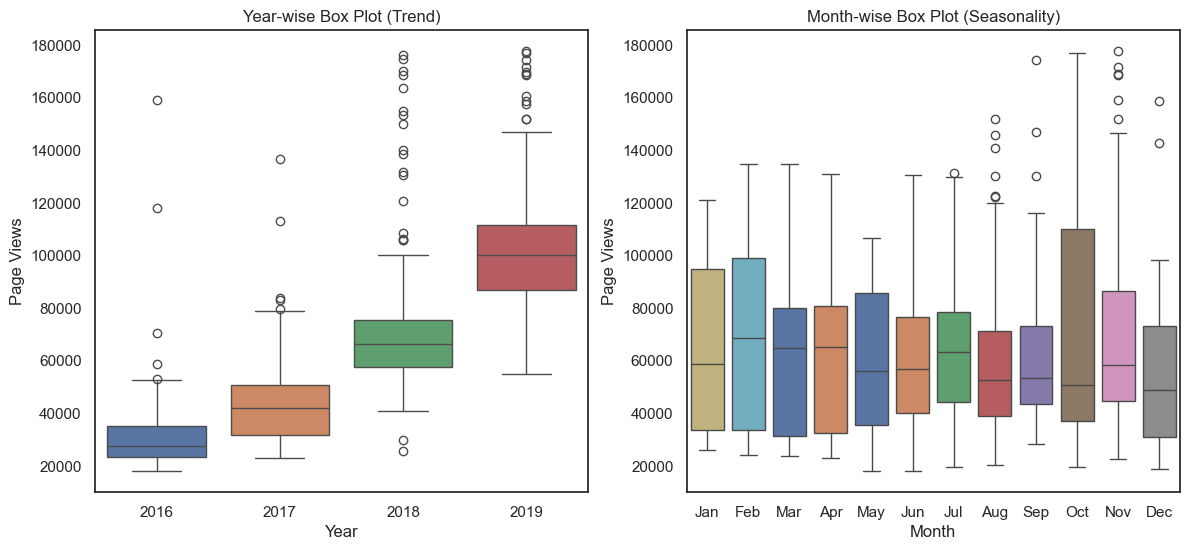

In [118]:
# Draw box plots (using Seaborn)
sns.set(style="white")

fig, ax = plt.subplots(1, 2, figsize=[14, 6])

sns.boxplot(
    data=df_box,
    x="year",
    y="value",
    hue="year",
    palette="deep",
    legend=False,
    ax=ax[0]
)

sns.boxplot(
    data=df_box,
    x="month",
    y="value",
    hue="month",
    palette="deep",
    order=months_in_order,
    legend=False,
    ax=ax[1]
)

ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")

ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")

plt.show()
